# K Means Clustering 

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [20]:
from sklearn.datasets import make_blobs

In [21]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=90)

<AxesSubplot:>

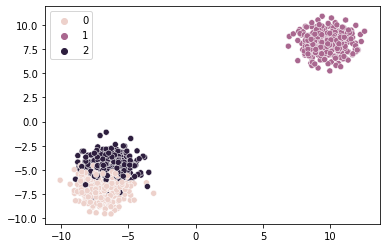

In [22]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=90)

In [25]:
from sklearn.cluster import KMeans

### Elbow method to select k value 

In [28]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

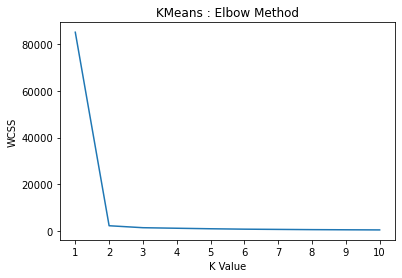

In [37]:
k=[i for i in range(1,11)]
plt.plot(k,wcss)
plt.xticks(range(1,11))
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("KMeans : Elbow Method")
plt.show()

In [39]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(x_train)

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [54]:
y_labels=kmeans.fit_predict(x_train)

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<AxesSubplot:>

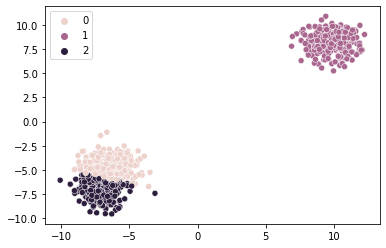

In [55]:
sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_labels)

### K values using kneed method 

In [44]:
!pip install kneed

In [57]:
from kneed import KneeLocator

In [58]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

2

In [59]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [61]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

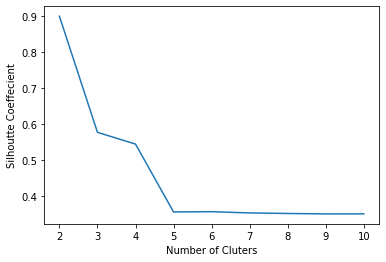

In [62]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

# Hirarichal Clustering 

In [64]:
## Import IRIS dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris=datasets.load_iris()

In [65]:
iris_data=pd.DataFrame(iris.data)

In [66]:
iris_data.columns=iris.feature_names

In [67]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [69]:
X_scaled=scaler.fit_transform(iris_data)

In [70]:
## Apply the PCA
from sklearn.decomposition import PCA

In [71]:
pca=PCA(n_components=2)

In [72]:
pca_scaled=pca.fit_transform(X_scaled)

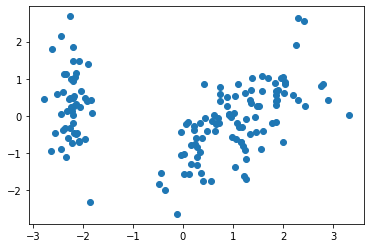

In [73]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

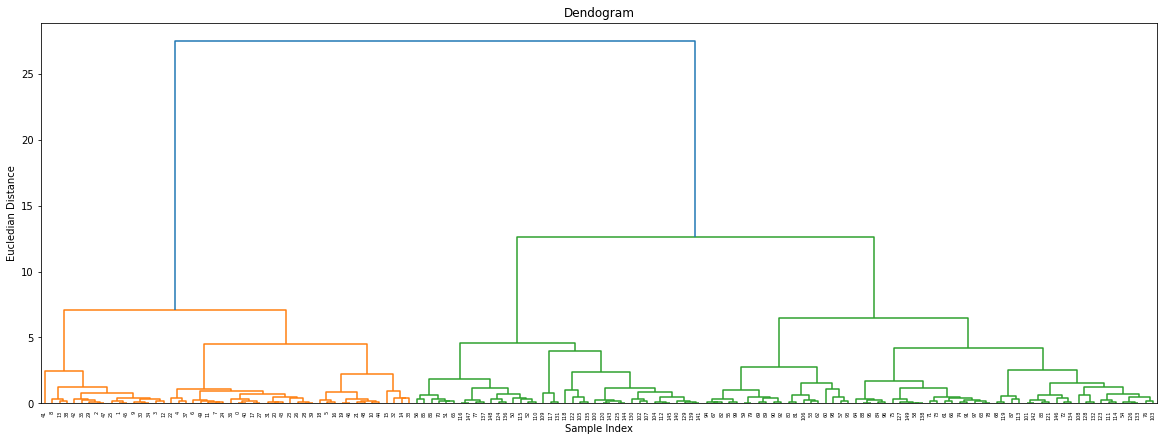

In [74]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [75]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [76]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

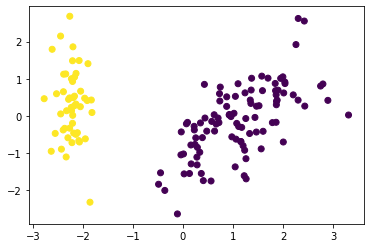

In [77]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [78]:
## silhouette score
from sklearn.metrics import silhouette_score

In [79]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarnin

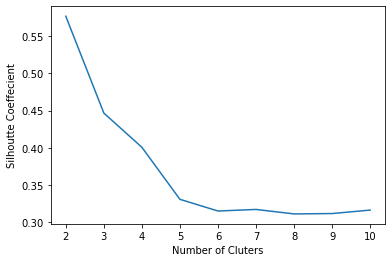

In [80]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

# DBSCAN

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
X,y=make_moons(n_samples=250,noise=0.10)

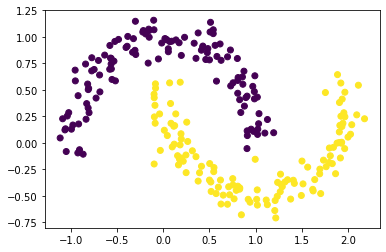

In [83]:
plt.scatter(X[:,0],X[:,1],c=y)

In [84]:
##feature scaling(Standard Scaling)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [85]:
X_scaled=scaler.fit_transform(X)

In [89]:
dbcan=DBSCAN(eps=0.3)

In [90]:
dbcan.fit(X_scaled)

DBSCAN(eps=0.3)

In [91]:
dbcan.labels_

array([ 0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,
        1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,
        0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  0,
        0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1,
        1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,
        1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,
        1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  0,  0,
        0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,
        1,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  1,  0,
        1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  1

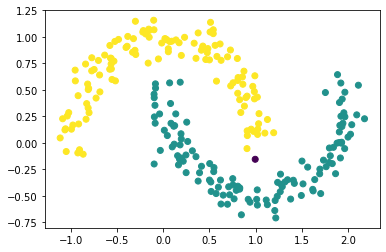

In [92]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)

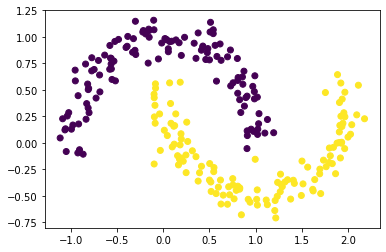

In [93]:
plt.scatter(X[:,0],X[:,1],c=y)